In [0]:
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
from skimage import color, exposure
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

In [3]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_signs'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_signs


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')


X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),

    Flatten(),

    Dense(num_classes, activation='softmax'),
])

In [0]:
def get_cnn_vl(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),

    Flatten(),

    Dense(num_classes, activation='softmax'),
])


def train_model(model, X_train,y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train,
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (X_train,y_train)),
      callbacks=[tensorboard_callback]
  )
  return model 

In [7]:
model = get_cnn_vl(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 17.8358 - accuracy: 0.7557 - val_loss: 0.2641 - val_accuracy: 0.9346
Epoch 2/5
272/272 [==============================] - 3s 12ms/step - loss: 0.2174 - accuracy: 0.9477 - val_loss: 0.1104 - val_accuracy: 0.9716
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1448 - accuracy: 0.9647 - val_loss: 0.1297 - val_accuracy: 0.9688
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.0996 - accuracy: 0.9756 - val_loss: 0.0813 - val_accuracy: 0.9813
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.0797 - accuracy: 0.9810 - val_loss: 0.0424 - val_accuracy: 0.9906


In [0]:
df= pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):
  y_test_norm = np.argmax(y_test, axis=1)       #true values

  y_pred_prob = model_trained.predict(X_test)   #predicted values
  y_pred = np.argmax(y_pred_prob, axis=1)       #shows where is the biggest probability

  return scoring(y_test_norm, y_pred)

In [38]:
#accuracy of predicting
predict(model_trained, X_test, y_test)

0.8317460317460318

In [0]:
# function for training and predicting every sing
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

##Architecture engineering

In [50]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax'),
])
train_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 10ms/step - loss: 4.9437 - accuracy: 0.2641 - val_loss: 1.2903 - val_accuracy: 0.6856
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 1.1608 - accuracy: 0.6644 - val_loss: 0.4106 - val_accuracy: 0.9134
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.6478 - accuracy: 0.8092 - val_loss: 0.1914 - val_accuracy: 0.9522
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.4446 - accuracy: 0.8674 - val_loss: 0.1191 - val_accuracy: 0.9780
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.3384 - accuracy: 0.8980 - val_loss: 0.0767 - val_accuracy: 0.9826


0.9315192743764172

In [55]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
])
train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 2.4178 - accuracy: 0.4602 - val_loss: 0.4739 - val_accuracy: 0.8945
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.5706 - accuracy: 0.8232 - val_loss: 0.1436 - val_accuracy: 0.9672
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.3469 - accuracy: 0.8874 - val_loss: 0.0922 - val_accuracy: 0.9749
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2639 - accuracy: 0.9182 - val_loss: 0.0568 - val_accuracy: 0.9878
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1924 - accuracy: 0.9396 - val_loss: 0.0467 - val_accuracy: 0.9917


0.9698412698412698

In [52]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding='same'),
    MaxPool2D(),
    Dropout(0.3),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),


    Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),


    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax'),
])
train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.8849 - accuracy: 0.2452 - val_loss: 1.2929 - val_accuracy: 0.6544
Epoch 2/5
272/272 [==============================] - 3s 13ms/step - loss: 1.0901 - accuracy: 0.6621 - val_loss: 0.3136 - val_accuracy: 0.9259
Epoch 3/5
272/272 [==============================] - 3s 13ms/step - loss: 0.5826 - accuracy: 0.8201 - val_loss: 0.1523 - val_accuracy: 0.9613
Epoch 4/5
272/272 [==============================] - 3s 13ms/step - loss: 0.3752 - accuracy: 0.8855 - val_loss: 0.0860 - val_accuracy: 0.9760
Epoch 5/5
272/272 [==============================] - 3s 13ms/step - loss: 0.2908 - accuracy: 0.9109 - val_loss: 0.0711 - val_accuracy: 0.9806


0.9433106575963719

In [54]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding='same'),
    MaxPool2D(),
    Dropout(0.3),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),


    Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),


    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),


    Dense(num_classes, activation='softmax'),
])
train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.5161 - accuracy: 0.3170 - val_loss: 0.9558 - val_accuracy: 0.7179
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.8304 - accuracy: 0.7341 - val_loss: 0.2226 - val_accuracy: 0.9384
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.3702 - accuracy: 0.8847 - val_loss: 0.0891 - val_accuracy: 0.9723
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2454 - accuracy: 0.9247 - val_loss: 0.0663 - val_accuracy: 0.9802
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1923 - accuracy: 0.9433 - val_loss: 0.0317 - val_accuracy: 0.9912


0.9678004535147392

In [56]:
X_train[0].shape #shows 3 color channels -RGB, lets convert it to gray scale)

(32, 32, 3)

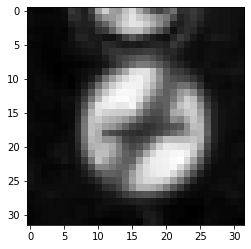

In [59]:
color.rgb2gray(X_train[0]).shape  #converted

#plotting X_train[0]
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'))

In [0]:
#changing RGB to gray scale in all pictures
X_train_gray = color.rgb2gray( X_train ).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray( X_test ).reshape(-1,32,32,1)

In [66]:
#how this improved our accuracy?
model = get_cnn_v5((32,32,1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 4s 15ms/step - loss: 2.3093 - accuracy: 0.3455 - val_loss: 0.6131 - val_accuracy: 0.8064
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.5036 - accuracy: 0.8365 - val_loss: 0.1297 - val_accuracy: 0.9609
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2315 - accuracy: 0.9269 - val_loss: 0.0590 - val_accuracy: 0.9830
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1479 - accuracy: 0.9528 - val_loss: 0.0365 - val_accuracy: 0.9901
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1115 - accuracy: 0.9649 - val_loss: 0.0222 - val_accuracy: 0.9941


0.971655328798186

In [0]:
#a bit...

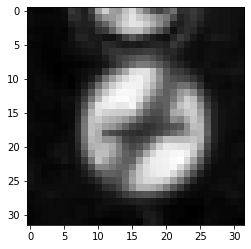

In [68]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'));